In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('Data Sheet - Sheet1.csv')
df.head()

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet


In [66]:
df.isnull().sum()

Crash_Severity            0
Vehicle_Speed             0
Crash_Time                0
Age                       0
Gender                    0
Vehicle_Type              0
Number_of_Lanes           0
Lane_Width                0
Road_Type                 0
Alcohol_Consumption       0
Crash_Type                0
Seatbelt_Usage            0
Speed_Limit               0
Road_Surface_Condition    0
dtype: int64

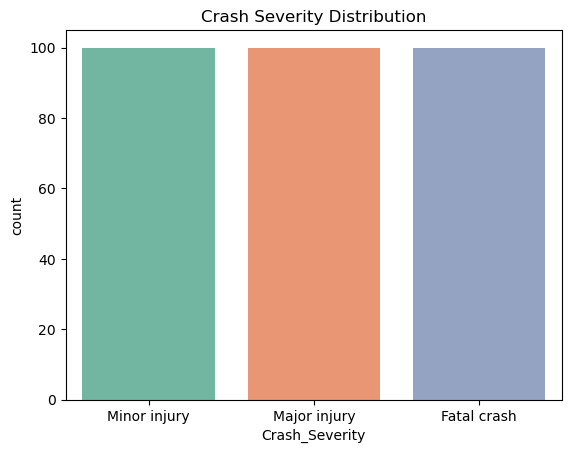

In [67]:
# Crash Severity Distribution
sns.countplot(x='Crash_Severity', data=df , palette='Set2')
plt.title("Crash Severity Distribution")
plt.show()

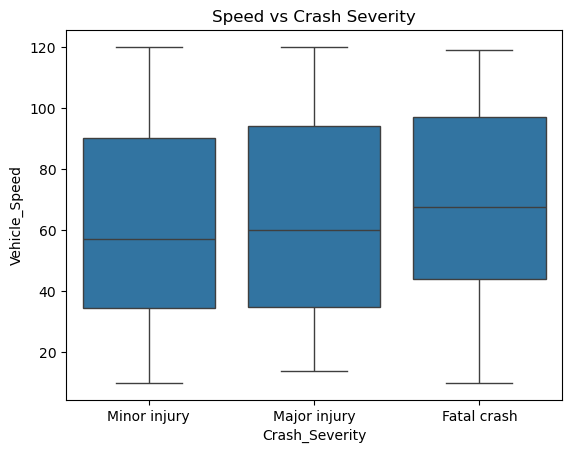

In [68]:
# Visualize the impact of Speed on Crash Severity
sns.boxplot( y ='Vehicle_Speed', x ='Crash_Severity', data=df)
plt.title("Speed vs Crash Severity")
plt.show()

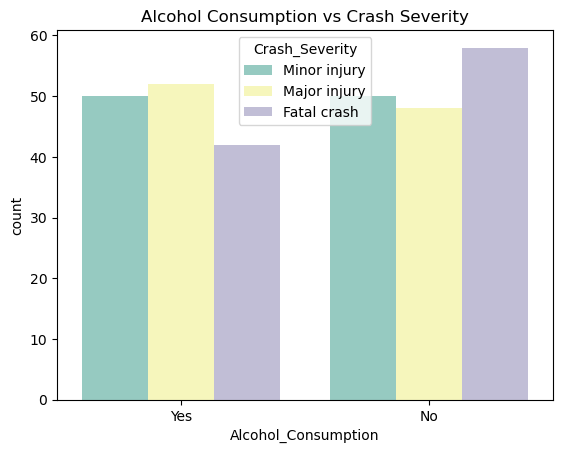

In [69]:
# Impact of Alcohol Consumption
sns.countplot(x='Alcohol_Consumption', hue='Crash_Severity', data=df, palette='Set3')
plt.title("Alcohol Consumption vs Crash Severity")
plt.show()

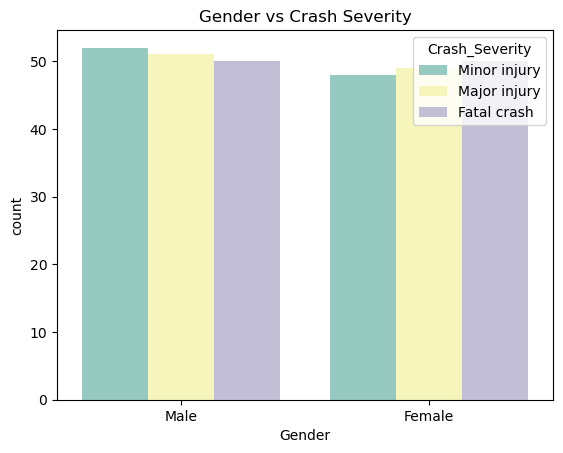

In [70]:
# Impact of Gender 
sns.countplot(x='Gender', hue='Crash_Severity', data=df, palette='Set3')
plt.title("Gender vs Crash Severity")
plt.show()

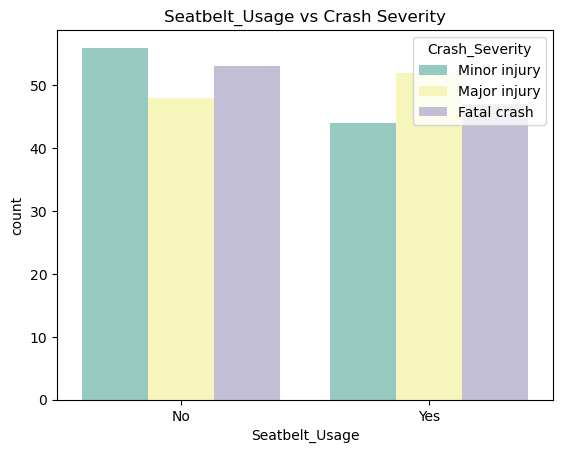

In [71]:
# Impact of Seat_belt
sns.countplot(x='Seatbelt_Usage', hue='Crash_Severity', data=df, palette='Set3')
plt.title("Seatbelt_Usage vs Crash Severity")
plt.show()

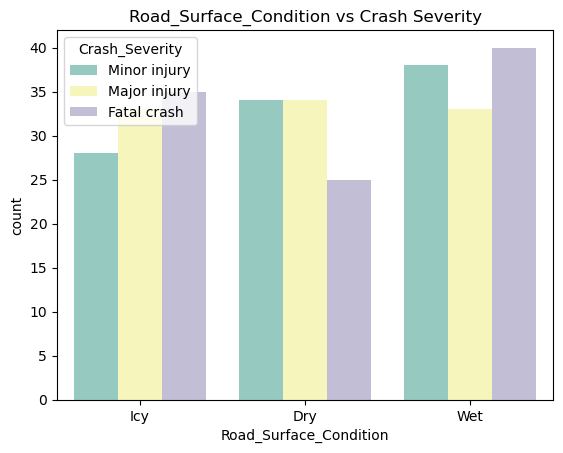

In [72]:
# Impact Road surface condition
sns.countplot(x='Road_Surface_Condition', hue='Crash_Severity', data=df, palette='Set3')
plt.title("Road_Surface_Condition vs Crash Severity")
plt.show()

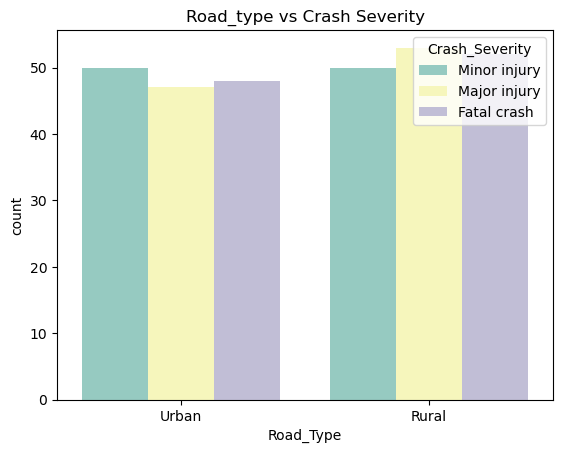

In [73]:
# Impact Road type condition
sns.countplot(x='Road_Type', hue='Crash_Severity', data=df, palette='Set3')
plt.title("Road_type vs Crash Severity")
plt.show()

In [74]:
df.describe()

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,64.366667,11.690000,48.663333,2.000000,3.272374,74.746667
std,31.951974,6.740327,18.432104,0.825999,0.143053,26.857903
min,10.000000,0.000000,18.000000,1.000000,3.001781,30.000000
25%,37.000000,5.750000,31.000000,1.000000,3.150568,51.000000
50%,60.500000,12.000000,51.000000,2.000000,3.285620,75.000000
75%,94.000000,17.000000,65.000000,3.000000,3.394545,97.250000
max,120.000000,23.000000,80.000000,3.000000,3.497986,120.000000


In [75]:
df['Crash_Type'].value_counts()

Crash_Type
Rear-end    154
Head-on     146
Name: count, dtype: int64

In [77]:
# Encode target variable
df['Crash_Severity'] = df['Crash_Severity'].map({'Minor injury': 0, 'Major injury': 1, 'Fatal crash': 2})

In [79]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns
categorical_columns = ['Gender', 'Vehicle_Type', 'Road_Type', 'Alcohol_Consumption', 'Crash_Type', 'Seatbelt_Usage', 'Road_Surface_Condition']

# Subset the DataFrame
categorical_data = df[categorical_columns]

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity if needed

# Fit and transform the categorical data
encoded_data = ohe.fit_transform(categorical_data)

# Convert to a DataFrame for readability (optional)
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_columns))

# Combine encoded data with the original DataFrame (excluding the original categorical columns)
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

In [49]:
# Check the resulting DataFrame
df.head()

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Road_Type_Urban,Alcohol_Consumption_Yes,Crash_Type_Rear-end,Seatbelt_Usage_Yes,Road_Surface_Condition_Icy,Road_Surface_Condition_Wet
0,Minor injury,107,11,27,2,3.484386,30,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,Minor injury,27,16,39,2,3.293091,110,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,Minor injury,87,14,42,3,3.218911,59,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Minor injury,43,3,60,2,3.113012,73,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Minor injury,72,8,70,3,3.106580,42,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


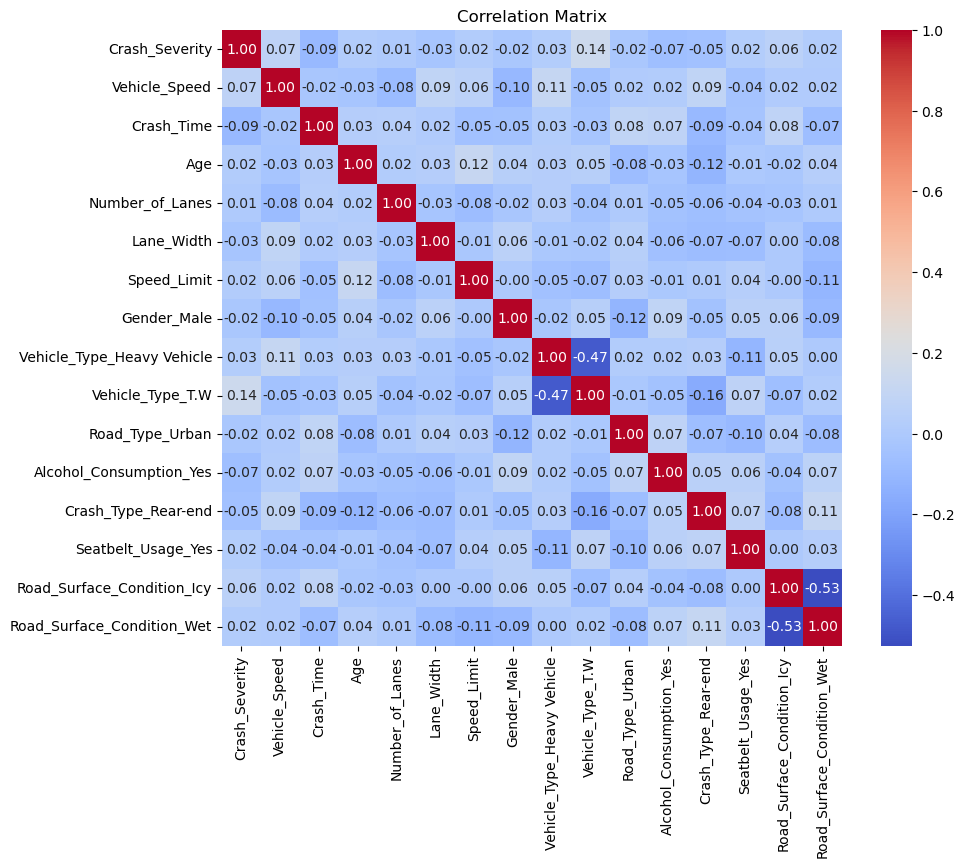

In [80]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [82]:
x = df.drop(['Crash_Severity' , 'Crash_Time' ] , axis = 1)
y = df['Crash_Severity']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 3 , scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_sa

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        22
           1       0.20      0.38      0.26        16
           2       0.44      0.32      0.37        22

    accuracy                           0.27        60
   macro avg       0.28      0.28      0.27        60
weighted avg       0.29      0.27      0.27        60



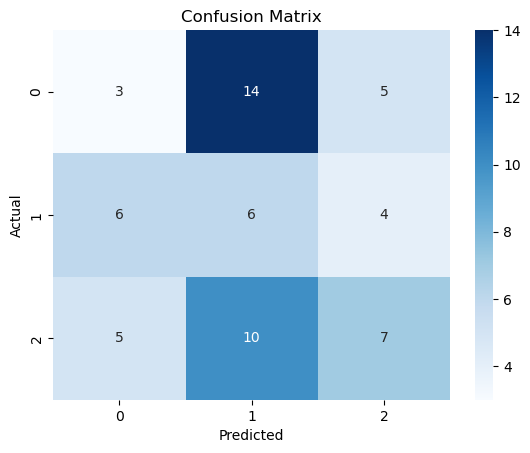

Accuracy: 26.67%


In [85]:
# Predictions
y_pred = best_rf.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")